195.9678
<class 'galsim.sensor.SiliconSensor'>


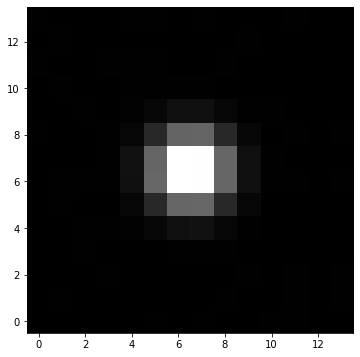

In [17]:
import sys
import os
import math
import logging
import galsim
import matplotlib.pyplot as plt

"""
About as simple as it gets:
  - Use a circular Gaussian profile for the galaxy.
  - Convolve it by a circular Gaussian PSF.
  - Add Gaussian noise to the image.
"""
gal_flux = 2.e5    # total counts on the image
gal_sigma = 0.2     # arcsec
psf_sigma = 0.01     # arcsec
pixel_scale = 0.2  # arcsec / pixel
noise = 30.        # standard deviation of the counts in each pixel

# Define the galaxy profile
gal = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)

# Define the PSF profile
psf = galsim.Gaussian(flux=1., sigma=psf_sigma) # PSF flux should always = 1

# Final profile is the convolution of these
# Can include any number of things in the list, all of which are convolved
# together to make the final flux profile.
final = galsim.Convolve([gal, psf])

# Draw the image with a particular pixel scale, given in arcsec/pixel.
# The returned image has a member, added_flux, which is gives the total flux actually added to
# the image.  One could use this value to check if the image is large enough for some desired
# accuracy level.  Here, we just ignore it.
#image = final.drawImage(scale=pixel_scale)
image = final.drawImage(scale=pixel_scale, method = "phot", save_photons=True)

# Add Gaussian noise to the image with specified sigma
image.addNoise(galsim.GaussianNoise(sigma=noise))

# Add sensor effects
sensor = galsim.SiliconSensor(strength = 1.0, diffusion_factor=100, nrecalc=10000)
photons = galsim.PhotonArray(100000)
sensor.accumulate(photons, image)
bf_effect = sensor.calculate_pixel_areas(image)
import numpy as np
print(np.sum(bf_effect.array))

results = image.FindAdaptiveMom()
print(type(sensor))

# plot it
f,ax = plt.subplots(1,1, figsize=(8,6))
#from matplotlib.colors import LogNorm
im = ax.imshow(image.array,origin='lower',interpolation='None', cmap="gray")

